ChatLog:
https://chatgpt.com/share/66f5f891-9ae0-8003-b294-1f8849133038
https://chatgpt.com/share/66f60461-ee0c-8003-a6ba-2a50e52421da

Summary of ChatBot interaction

In our discussion about data visualization methods, we focused on three key types: histograms, Kernel Density Estimate (KDE) plots, and box plots. Each method offers distinct advantages and limitations in depicting data distributions and statistical metrics.

Histograms
Pros:
Effectively visualize frequency distribution.
Clearly indicate sample size through bar heights.
Help identify patterns such as skewness and modality.
Cons:
Sensitive to bin size, which can affect interpretation.
Do not provide key statistical metrics (e.g., median, quartiles).
May be noisy with small sample sizes.

Kernel Density Estimate (KDE) Plots
Pros:
Provide a smooth estimate of the probability density function.
Effectively reveal multiple modes in the data.
Allow adjustable bandwidth for flexibility.
Cons:
Do not indicate sample size directly.
Sensitive to bandwidth selection, which can influence results.
Lack clear statistical metrics.

Box Plots
Pros:
Summarize key statistics: median, quartiles, minimum/maximum, and outliers.
Allow easy comparison between groups.
Highlight outliers effectively.
Cons:
Do not show actual data distribution.
May oversimplify data characteristics.
Typically do not indicate sample size unless annotated.

Conclusion
While histograms are effective for showing data distribution and sample size, box plots provide valuable statistical metrics. KDE plots offer a smooth representation but lack indications of sample size. Utilizing these visualizations together can enhance the understanding of datasets.

Histogram Creation
The user requested code to create histograms of flipper length (flipper_length_mm) for different penguin species in the penguins dataset using Plotly. The task included adding statistical annotations like mean, median, range, interquartile range (IQR), and ±2 standard deviations.

Readability Adjustments
The user asked for adjustments to the histogram annotations to prevent overlap and improve readability. This included repositioning annotations and zooming in on the Adelie species plot for better separation.

Switch to Seaborn
The user expressed a desire to use Seaborn's KDE plotting functionality instead of Plotly for creating density plots of flipper length. They requested to ensure that all necessary statistical annotations were included.

Final KDE Plot Implementation
The final implementation used Seaborn to create KDE plots for each species with clear statistical annotations. The plots were organized in a single row with shared y-axes, effectively presenting the density of flipper lengths and relevant statistics.

Comprehensive Visualization
The outcome was a visually informative set of KDE plots, fulfilling the user's request for statistical clarity and readability.



# Question 1

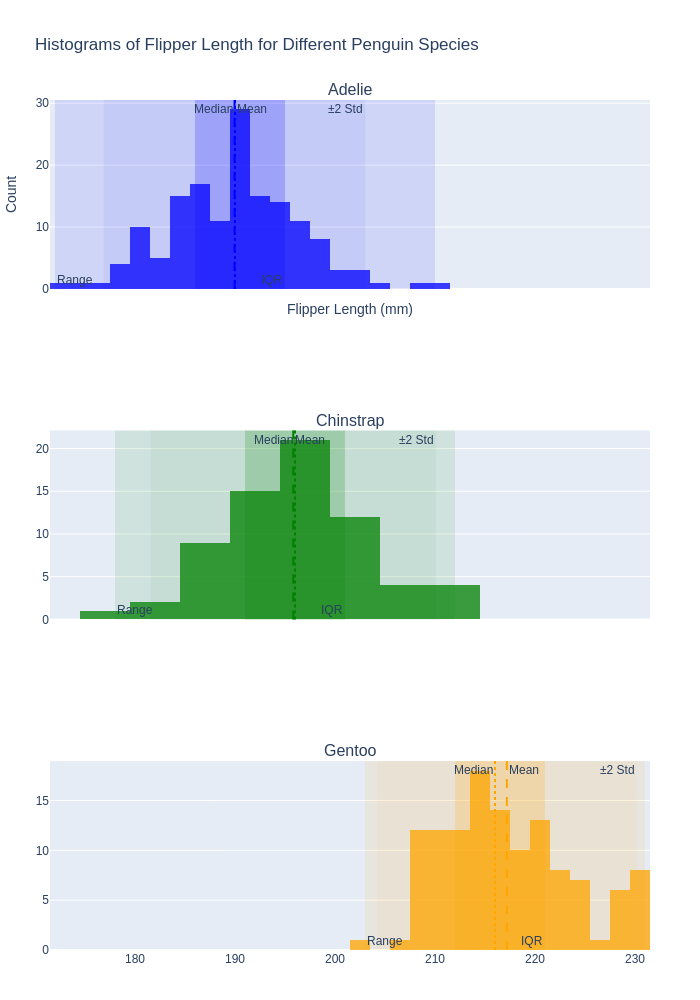

In [1]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Group by species and calculate the required statistics
summary_stats = penguins_clean.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min_val='min',
    max_val='max',
    std_dev='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

summary_stats['lower_2std'] = summary_stats['mean'] - 2 * summary_stats['std_dev']
summary_stats['upper_2std'] = summary_stats['mean'] + 2 * summary_stats['std_dev']

# Create subplots for each species
fig = sp.make_subplots(rows=3, cols=1, subplot_titles=summary_stats['species'], shared_xaxes=True)

# Define color palette for species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'orange'
}

# Plot each species in a separate subplot
for i, species in enumerate(summary_stats['species']):
    species_data = penguins_clean[penguins_clean['species'] == species]
    stats = summary_stats[summary_stats['species'] == species].iloc[0]
    species_color = color_map[species]
    
    # Add histogram for the current species
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'], 
        name=f'{species} Histogram', 
        marker_color=species_color,
        opacity=0.75,
        showlegend=False  # Avoid clutter in legend with individual histograms
    ), row=i+1, col=1)
    
    # Add vertical lines for mean and median with valid annotation positions
    fig.add_vline(
        x=stats['mean'], 
        line=dict(color=species_color, dash='dash', width=2), 
        row=i+1, col=1,
        annotation_text='Mean', 
        annotation_position="top right"
    )
    fig.add_vline(
        x=stats['median'], 
        line=dict(color=species_color, dash='dot', width=2), 
        row=i+1, col=1,
        annotation_text='Median', 
        annotation_position="top left"
    )
    
    # Add shaded regions (vrect) for range, IQR, and ±2 std dev
    fig.add_vrect(
        x0=stats['min_val'], x1=stats['max_val'], 
        fillcolor=species_color, opacity=0.1, line_width=0, 
        row=i+1, col=1, 
        annotation_text='Range', annotation_position='bottom left'
    )
    fig.add_vrect(
        x0=stats['q1'], x1=stats['q3'], 
        fillcolor=species_color, opacity=0.2, line_width=0, 
        row=i+1, col=1, 
        annotation_text='IQR', annotation_position='bottom right'
    )
    fig.add_vrect(
        x0=stats['lower_2std'], x1=stats['upper_2std'], 
        fillcolor=species_color, opacity=0.05, line_width=0, 
        row=i+1, col=1, 
        annotation_text='±2 Std', annotation_position='top right'  # Changed position to valid option
    )
    
    # If species is Adelie, zoom in on the x-axis range
    if species == 'Adelie':
        fig.update_xaxes(range=[185, 195], row=i+1, col=1)

# Update layout with a well-positioned legend and adjusted spacing
fig.update_layout(
    title="Histograms of Flipper Length for Different Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    showlegend=True,  # Show a single, compact legend for the entire plot
    height=1000,  # Adjust height to fit subplots
    legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.05),
    margin=dict(l=50, r=50, t=100, b=50)  # Increase space between subplots and annotations
)

# Show plot
fig.show(renderer="png")


# Question 2

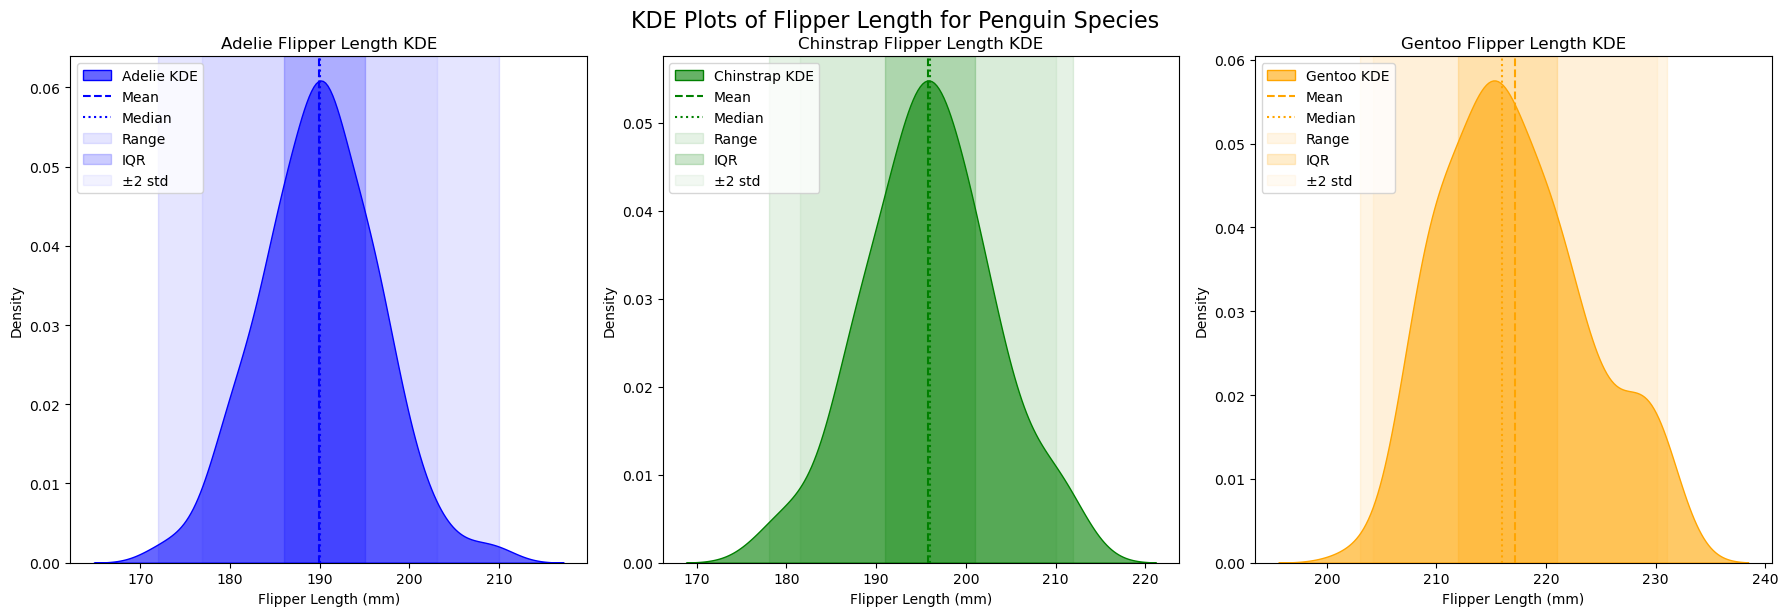

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Group by species and calculate the required statistics
summary_stats = penguins_clean.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min_val='min',
    max_val='max',
    std_dev='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

summary_stats['lower_2std'] = summary_stats['mean'] - 2 * summary_stats['std_dev']
summary_stats['upper_2std'] = summary_stats['mean'] + 2 * summary_stats['std_dev']

# Define color palette for species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'orange'
}

# Create subplots for 3 species in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each species in a separate subplot
for i, species in enumerate(summary_stats['species']):
    species_data = penguins_clean[penguins_clean['species'] == species]
    stats = summary_stats[summary_stats['species'] == species].iloc[0]
    species_color = color_map[species]
    
    # KDE plot for the current species
    sns.kdeplot(
        species_data['flipper_length_mm'], 
        ax=axes[i], 
        fill=True, 
        color=species_color, 
        label=f'{species} KDE', 
        alpha=0.6
    )
    
    # Add vertical lines for mean and median
    axes[i].axvline(stats['mean'], color=species_color, linestyle='--', label='Mean')
    axes[i].axvline(stats['median'], color=species_color, linestyle=':', label='Median')
    
    # Add shaded regions (vrect) for range, IQR, and ±2 std dev
    # Range
    axes[i].axvspan(stats['min_val'], stats['max_val'], color=species_color, alpha=0.1, label='Range')
    
    # IQR
    axes[i].axvspan(stats['q1'], stats['q3'], color=species_color, alpha=0.2, label='IQR')
    
    # 2 standard deviations
    axes[i].axvspan(stats['lower_2std'], stats['upper_2std'], color=species_color, alpha=0.05, label='±2 std')

    # Set title and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    axes[i].legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.suptitle('KDE Plots of Flipper Length for Penguin Species', y=1.02, fontsize=16)

# Show plot
plt.show()


# QUESTION 3
url to the website: https://seaborn.pydata.org/tutorial/distributions.html
urls to the images
1. Histogram: https://seaborn.pydata.org/_images/distributions_3_0.png 
2. KDE plot https://seaborn.pydata.org/_images/distributions_33_0.png
3. Box plot: https://seaborn.pydata.org/_images/distributions_84_0.png

The preference of visualization methods depends on the goal of analysis, if it is to learn about the distribution of the data, a histogram will be preferable, but if it is to understand the statistical characteristics of the dataset, a box plot will complete the task better. Rationale:
A histogram is suitable for understanding the distribution of data since it counts the occurrence of data across ranges, represented by bins. The width of bins can be adjusted so that it can show the distribution of data better. Moreover, histograms also provide the sample size, which should be considered, especially when studying a population through the sample distribution.
A box plot is better at studying the statistical characteristics of a dataset because it provides the skewness of the dataset and distribution metrics (quartiles, median, IQR, min/max, outliners,...) through annotations around the whisket. Although it does not include the sample size and the dataset's mode, this visualization method is ideal for learning the statistics of the object.

# QUESTION 4. 


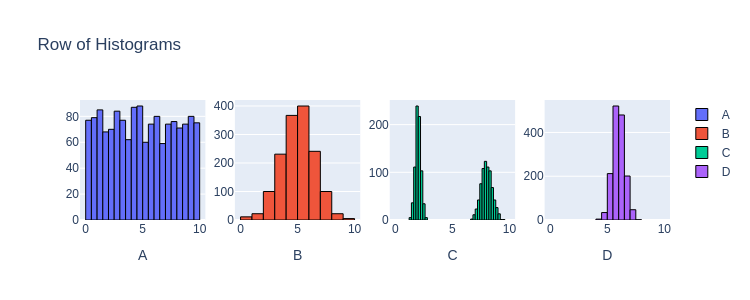

Means: 4.951721644909551 4.997264735577609 4.994539218463753 5.990061187906914
Variances: 8.422844154825196 2.2188391189275247 9.159282996747706 0.2657209140473599


In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)
fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print ('Means:', np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4))
print("Variances:", np.var(data1, ddof=1), np.var(data2, ddof=1), np.var(data3, ddof=1), np.var(data4, ddof=1))

Considered similar when: abs(value1-value2) < 1 \
    
1. Datasets that have similar means and similar variances: A and C
2. Datasets that have similar means but quite different variances: A and B, B and C
3. Datasets that have similar variances but quite different means: none
4. Datasets have quite different means and quite different variances: A and D, B and D, C and D

# Question 6

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv")

Interpret the dataset:

- Step 1: Understand the Context
The superhero dataset contains various information about different superheroes, including their Intelligence, Strength, Speed,... with the information of the publisher (Marvel, DC, etc)
Questions to ask when analyzing characteristics of superheros 
How does alignment (good or bad) influence the abilities?
Are there any gender or race-based trends in power distribution?
What are the common traits among powerful superheroes?

- Step 2: Explore the Structure of the Data
To understand the dataset structure, we can examine its features:
It has several numeric columns such as intelligence, strength, speed, durability, and combat scores.
It also has categorical columns like gender, race, alignment, and publisher.
When checking for missing values, inconsistencies, or anomalies, some characters have missing race or eye color data, which is typical in large datasets (we will decide if we should omit this variable, or fill the blank with some values). To summarize the data, we can use descriptive statistics such as mean, minimum, maximum, and percentiles to get an overall idea of the range and distribution of the data.

- Step 3: Perform Initial Summarization
Next, we summarize the data:
For numeric columns, we can count the number of occurrences of each variable to get the overall statistics. For categorical data, also count the number of occurrence to see if there is any imbalance (female/male, or good/bad heroes) 

- Step 4: Visualize the Data
Depending on the goal of the analysis (analyze the distribution of characteristic(s) or study the statistical metrics), we can choose from one of these three visualization methods: histogram, KDE plot, or box plot,...
Example:
 + Histograms show the distribution of total power, where most superheroes fall into mid-range power levels, and only a few have extremely high or low powers.
 + A KDE plot to see if most of the heroes are bad or good.
 + Box plot to see the stats of heroes’ strength or intelligence.
